In [404]:
#pip install wordcloud

In [405]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [406]:
df = pd.read_csv("netflix.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [407]:
#changing the name of column {listed_in : genre}.
df.rename(columns = {"listed_in":'genre'}, inplace = True)

In [408]:
#droping the id col as it may be of no use in the analysis..
df.drop(columns = "show_id", inplace= True)

In [409]:
#Checking for null Values if any!
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
genre              0
description        0
dtype: int64

In [410]:
#droping the rows which have null values in date_added, rating, and duration column because these are very less in count..!!
df.dropna(subset=['date_added'],inplace = True)
df.dropna(subset=['rating'],inplace = True)
df.dropna(subset=['duration'],inplace = True)

In [411]:
#Checking for null Values if any!
df.isnull().sum()

type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
genre              0
description        0
dtype: int64

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      6169 non-null   object
 3   cast          7965 non-null   object
 4   country       7961 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   genre         8790 non-null   object
 10  description   8790 non-null   object
dtypes: int64(1), object(10)
memory usage: 824.1+ KB


In [413]:
#changing the data type of columns date_added from object to datetime..!!
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      6169 non-null   object        
 3   cast          7965 non-null   object        
 4   country       7961 non-null   object        
 5   date_added    8702 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   genre         8790 non-null   object        
 10  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 824.1+ KB


In [414]:
df.isnull().sum()

type               0
title              0
director        2621
cast             825
country          829
date_added        88
release_year       0
rating             0
duration           0
genre              0
description        0
dtype: int64

In [415]:
#again dropping the null values from column - date_added.!!
df.dropna(subset=['date_added'],inplace = True)

In [416]:
#Extracting the Day, Month, Year, Weekday and Month_Name from the date_added column..!!
df['day'] = df['date_added'].dt.day
df['month'] = df['date_added'].dt.month
df['year'] = df['date_added'].dt.year
df['month_name'] = df['date_added'].dt.month_name()
df['weekday'] = df['date_added'].dt.day_name()
df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday


In [417]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [418]:
'''
Replacing the column ['rating'] with the given values:
['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'] to 'Kids'
['PG-13','TV-14'] to 'Teens'
['R','TV-MA','NC-17'] to 'Adults' and rest ['NR','UR'] to np.nan
'''

"\nReplacing the column ['rating'] with the given values:\n['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'] to 'Kids'\n['PG-13','TV-14'] to 'Teens'\n['R','TV-MA','NC-17'] to 'Adults' and rest ['NR','UR'] to np.nan\n"

In [419]:
df['rating'] = df['rating'].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'Kids')
df['rating'] = df['rating'].replace(['PG-13','TV-14'],'Teens')
df['rating'] = df['rating'].replace(['R','TV-MA','NC-17'],'Adults')
df['rating'] = df['rating'].replace(['NR','UR'],np.nan)
df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday


In [420]:
#again dropping the null values from column - rating.!!
df.isnull().sum()

type               0
title              0
director        2538
cast             817
country          826
date_added         0
release_year       0
rating            81
duration           0
genre              0
description        0
day                0
month              0
year               0
month_name         0
weekday            0
dtype: int64

In [421]:
df.dropna(subset = ['rating'], inplace = True)

In [422]:
#Checking the commum null rows in all the 3 columns - director, cast and country.!!
df[(df['director'].isna())&(df['country'].isna())&(df['cast'].isna())].shape[0]

96

In [423]:
#There are total 96 null rows.! Now deleting these rows.!!
df.dropna(subset = ['director','country','cast'], how = 'all', inplace = True)

In [424]:
df.isnull().sum()

type               0
title              0
director        2439
cast             704
country          730
date_added         0
release_year       0
rating             0
duration           0
genre              0
description        0
day                0
month              0
year               0
month_name         0
weekday            0
dtype: int64

In [425]:
#Fetching the Dataset of casts on the baises of title from the data set - df!!
df_cast = pd.DataFrame(df['cast'].apply(lambda x:str(x).split(', ')).tolist(), index = df['title'])
df_cast.stack()
df_cast = pd.DataFrame(df_cast)
df_cast.reset_index(inplace = True)
df_cast = df_cast[['title',0]]
df_cast.columns = ['title','cast']
df_cast.replace('nan', np.nan, inplace = True)
df_cast.head(2)

,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,Ama Qamata


In [426]:
df_cast.isna().sum()

title      0
cast     704
dtype: int64

In [427]:
#Fetching the Dataset of director on the baises of title from the data set - df!!
df_director = pd.DataFrame(df['director'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_director = df_director.stack()
df_director = pd.DataFrame(df_director)
df_director.reset_index(inplace = True)
df_director = df_director[['title',0]]
df_director.columns= ['title', 'director']
df_director.replace('nan', np.nan, inplace = True)
df_director.head(2)

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NaN


In [428]:
df_director.isnull().sum()

title          0
director    2439
dtype: int64

In [429]:
#Fetching the Dataset of country on the baises of title from the data set - df!!
df_country = pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_country = df_country.stack()
df_country = pd.DataFrame(df_country)
df_country.reset_index(inplace = True)
df_country = df_country[['title', 0]]
df_country.columns = ['title', 'country']
df_country.replace('nan', np.nan, inplace = True)
df_country.head(2)

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa


In [430]:
df_country.isnull().sum()

title        0
country    730
dtype: int64

In [431]:
#Fetching the Dataset of gener on the baises of title from the data set - df!!
df_genre = pd.DataFrame(df['genre'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_genre = df_genre.stack()
df_genre = pd.DataFrame(df_genre)
df_genre.reset_index(inplace = True)
df_genre = df_genre[['title',0]]
df_genre.columns= ['title', 'genre']
df_genre.replace('nan', np.nan, inplace = True)
df_genre.head(2)

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows


In [432]:
df_genre.isnull().sum()

title    0
genre    0
dtype: int64

In [433]:
#Now Merging these 4 data frames in one DataFrame on the baises of title and named the new dataset as 'df_new'.!!

In [434]:
df12 = df_cast.merge(df_genre, on = 'title')
df12.head(2)

,title,cast,genre
0,Dick Johnson Is Dead,NaN,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows


In [435]:
df123 = df_director.merge(df12, on = 'title')
df123.head(2)

,title,director,cast,genre
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,NaN,Ama Qamata,International TV Shows


In [436]:
df1234 = df_country.merge(df123, on = 'title')
df1234.head(2)

,title,country,director,cast,genre
0,Dick Johnson Is Dead,United States,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,South Africa,NaN,Ama Qamata,International TV Shows


In [437]:
#Now merning the above dataframe df1234 to data frame df and named it df_new..!!
df_new = df.merge(df1234, on = 'title')
df_new.head(2)

,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,genre_x,description,day,month,year,month_name,weekday,country_y,director_y,cast_y,genre_y
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows


In [438]:
''' In the new DataFrame df_new, there are few columns which are available twice from the old and new data frames while
merged..!! Due to which need to drop the these 4 columns which are merged from the old dataframe df.!!
'''

' In the new DataFrame df_new, there are few columns which are available twice from the old and new data frames while\nmerged..!! Due to which need to drop the these 4 columns which are merged from the old dataframe df.!!\n'

In [439]:
# droping the columns - cast_x, director_x, gener_x and country_x..!!
df_new.drop(columns = ['cast_x','country_x','director_x','genre_x'],inplace=True)

#renaming the columns - {'country_y':'country','director_y':'director', 'cast_y':'cast','gener_y':'gener'}..!!
df_new.rename(columns={'country_y':'country','director_y':'director','cast_y':'cast','genre_y':'genre'},inplace=True)
df_new.head(2)

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows


In [440]:
df_new.shape

(25207, 16)

In [441]:
df_new.isnull().sum()

type               0
title              0
date_added         0
release_year       0
rating             0
duration           0
description        0
day                0
month              0
year               0
month_name         0
weekday            0
country         1632
director        6154
cast            1882
genre              0
dtype: int64

In [442]:
#replacing the null values to 'Unknown'
df_new['cast'] = df_new['cast'].replace(np.nan, 'Unknown')
df_new['country'] = df_new['country'].replace(np.nan, 'Unknown')
df_new['director'] = df_new['director'].replace(np.nan, 'Unknown')

In [443]:
df_new.isnull().sum()

type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
day             0
month           0
year            0
month_name      0
weekday         0
country         0
director        0
cast            0
genre           0
dtype: int64

In [444]:
#Checking for the duplicates if any.!
df_new.duplicated().sum()

6

In [445]:
#dropping the duplicates
df_new.drop_duplicates(keep = 'first', inplace = True)

In [446]:
df_new.shape

(25201, 16)

In [447]:
df_new.duplicated().sum()

0

In [448]:
df_new['type'].value_counts()

type
Movie      18506
TV Show     6695
Name: count, dtype: int64

In [449]:
#Fetching the Movies and TV Show form the dataframe df_new and assigned a new name to both.!!
df_movies = df_new.loc[df_new['type']=='Movie']
df_tvs = df_new.loc[df_new['type']=='TV Show']

In [450]:
df_movies.shape

(18506, 16)

In [451]:
df_tvs.shape

(6695, 16)

In [452]:
df_movies['duration'].unique()

array(['90 min', '91 min', '125 min', '104 min', '127 min', '67 min',
       '94 min', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '110 min', '105 min', '96 min',
       '124 min', '116 min', '98 min', '23 min', '115 min', '122 min',
       '99 min', '88 min', '100 min', '102 min', '93 min', '95 min',
       '85 min', '83 min', '113 min', '13 min', '182 min', '48 min',
       '145 min', '87 min', '92 min', '80 min', '117 min', '128 min',
       '119 min', '143 min', '114 min', '118 min', '108 min', '63 min',
       '121 min', '142 min', '154 min', '120 min', '82 min', '109 min',
       '101 min', '86 min', '229 min', '76 min', '89 min', '156 min',
       '112 min', '107 min', '129 min', '135 min', '136 min', '165 min',
       '150 min', '133 min', '70 min', '84 min', '140 min', '78 min',
       '64 min', '59 min', '139 min', '69 min', '148 min', '189 min',
       '141 min', '130 min', '138 min', '81 min', '132 min', '123 min',
       '65

In [453]:
#removing the substring - min from the column 'duration' ..!!
df_movies['duration'] = df_movies['duration'].str.replace('min', "")
df_movies.head(2)

C:\Users\dell\AppData\Local\Temp\ipykernel_9340\2221774956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].str.replace('min', "")


,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
13,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Vanessa Hudgens,Children & Family Movies


In [454]:
#Verifing substring min been removed or not!!
df_movies['duration'].unique()

array(['90 ', '91 ', '125 ', '104 ', '127 ', '67 ', '94 ', '161 ', '61 ',
       '166 ', '147 ', '103 ', '97 ', '106 ', '111 ', '110 ', '105 ',
       '96 ', '124 ', '116 ', '98 ', '23 ', '115 ', '122 ', '99 ', '88 ',
       '100 ', '102 ', '93 ', '95 ', '85 ', '83 ', '113 ', '13 ', '182 ',
       '48 ', '145 ', '87 ', '92 ', '80 ', '117 ', '128 ', '119 ', '143 ',
       '114 ', '118 ', '108 ', '63 ', '121 ', '142 ', '154 ', '120 ',
       '82 ', '109 ', '101 ', '86 ', '229 ', '76 ', '89 ', '156 ', '112 ',
       '107 ', '129 ', '135 ', '136 ', '165 ', '150 ', '133 ', '70 ',
       '84 ', '140 ', '78 ', '64 ', '59 ', '139 ', '69 ', '148 ', '189 ',
       '141 ', '130 ', '138 ', '81 ', '132 ', '123 ', '65 ', '68 ', '66 ',
       '62 ', '74 ', '131 ', '39 ', '46 ', '38 ', '126 ', '155 ', '159 ',
       '137 ', '12 ', '273 ', '36 ', '34 ', '77 ', '60 ', '49 ', '58 ',
       '72 ', '204 ', '212 ', '25 ', '73 ', '47 ', '32 ', '35 ', '71 ',
       '149 ', '33 ', '15 ', '54 ', '224 ', '162 ',

In [455]:
df_tvs['duration'].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons'],
      dtype=object)

In [456]:
#removing the substring 'Seasons' and 'Season'from the column - 'duration'.!! 
df_tvs['duration'] = df_tvs['duration'].str.replace('Seasons', "")
df_tvs['duration'] = df_tvs['duration'].str.replace('Season', "")

C:\Users\dell\AppData\Local\Temp\ipykernel_9340\3026053184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs['duration'] = df_tvs['duration'].str.replace('Seasons', "")
C:\Users\dell\AppData\Local\Temp\ipykernel_9340\3026053184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs['duration'] = df_tvs['duration'].str.replace('Season', "")


In [457]:
#Verifing it's been removed or not!!
df_tvs['duration'].unique()

array(['2 ', '1 ', '9 ', '4 ', '5 ', '3 ', '6 ', '7 ', '10 ', '8 ', '17 ',
       '13 ', '15 ', '12 '], dtype=object)

In [458]:
#renaming the column - {'duration':'seasons'}.!!
df_tvs.rename(columns = {'duration':'seasons'},inplace = True)

C:\Users\dell\AppData\Local\Temp\ipykernel_9340\2867610597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs.rename(columns = {'duration':'seasons'},inplace = True)


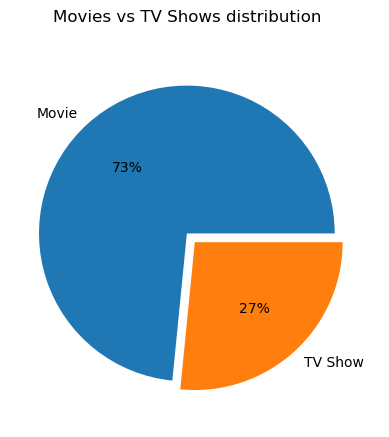

In [460]:
plt.pie(df_new['type'].value_counts(),labels = df_new['type'].value_counts().index,explode = (0.08,0),autopct = '%0.0f%%')
plt.suptitle('Movies vs TV Shows distribution')
plt.show()

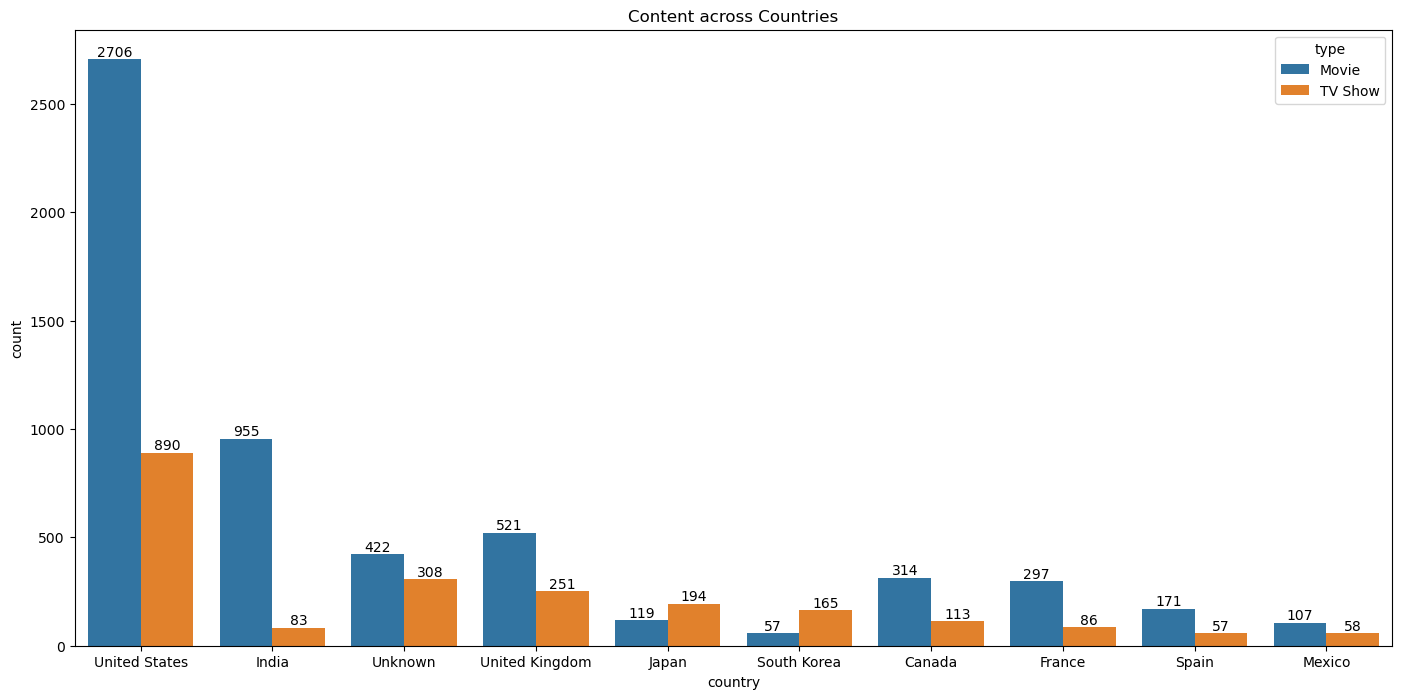

In [479]:
plt.figure(figsize = (17,8))
plt.title('Content across Countries')
label = sns.countplot(data = df_new.drop_duplicates(subset = ['country', 'title']), x = 'country', hue = 'type', 
                      order=df_temp['country'].value_counts().head(10).index)
for i in label.containers:
    label.bar_label(i)
plt.show()

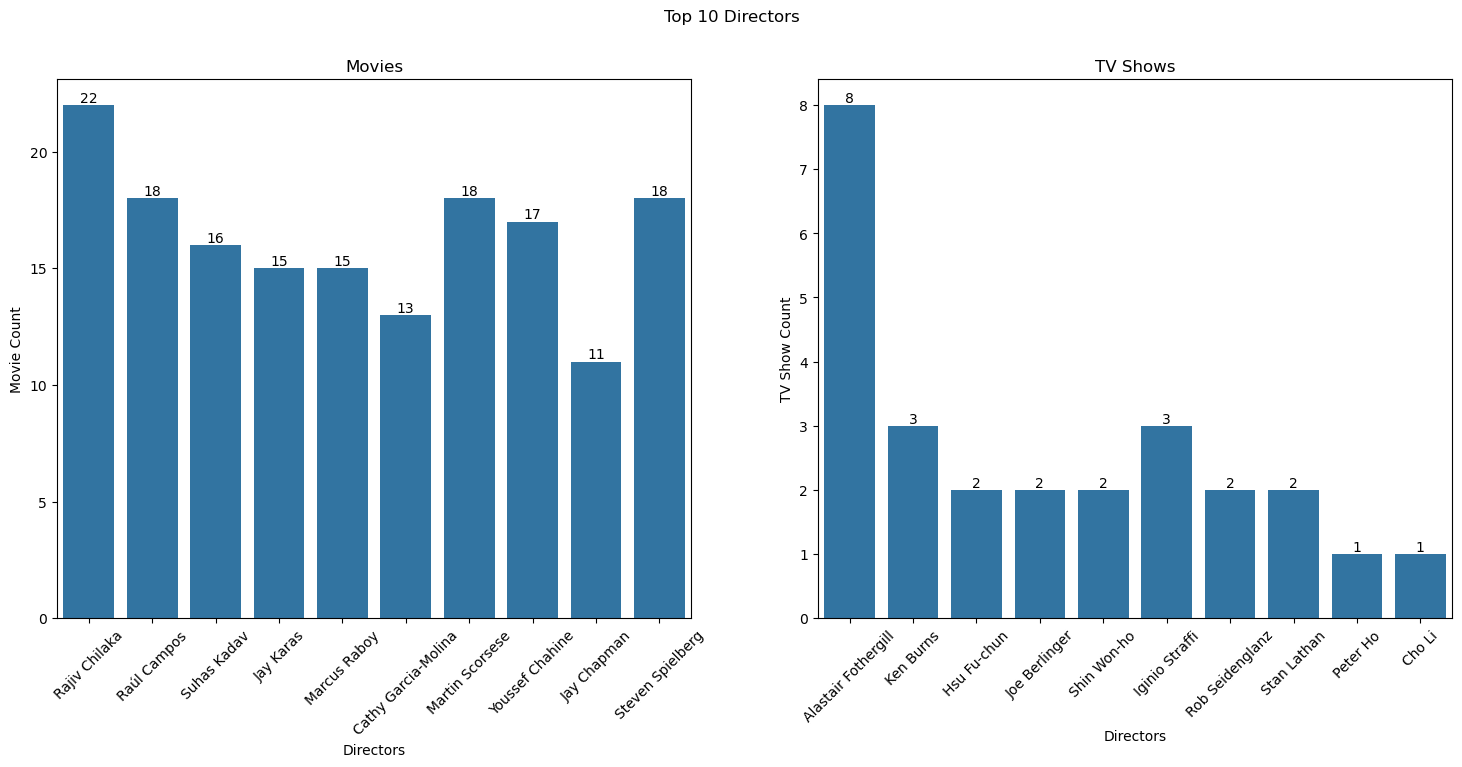

In [480]:
plt.figure(figsize = (18,7))
plt.suptitle('Top 10 Directors')

plt.subplot(1,2,1)
label = sns.countplot(data = df_movies.drop_duplicates(subset = ['country', 'title']), x = 'director',
                      order = df_movies_temp['director'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title('Movies')
plt.xticks(rotation = 45)
plt.xlabel('Directors')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs.drop_duplicates(subset = ['country', 'title']), x='director', 
                      order = df_tvs_temp['director'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('TV Show Count')

plt.show()

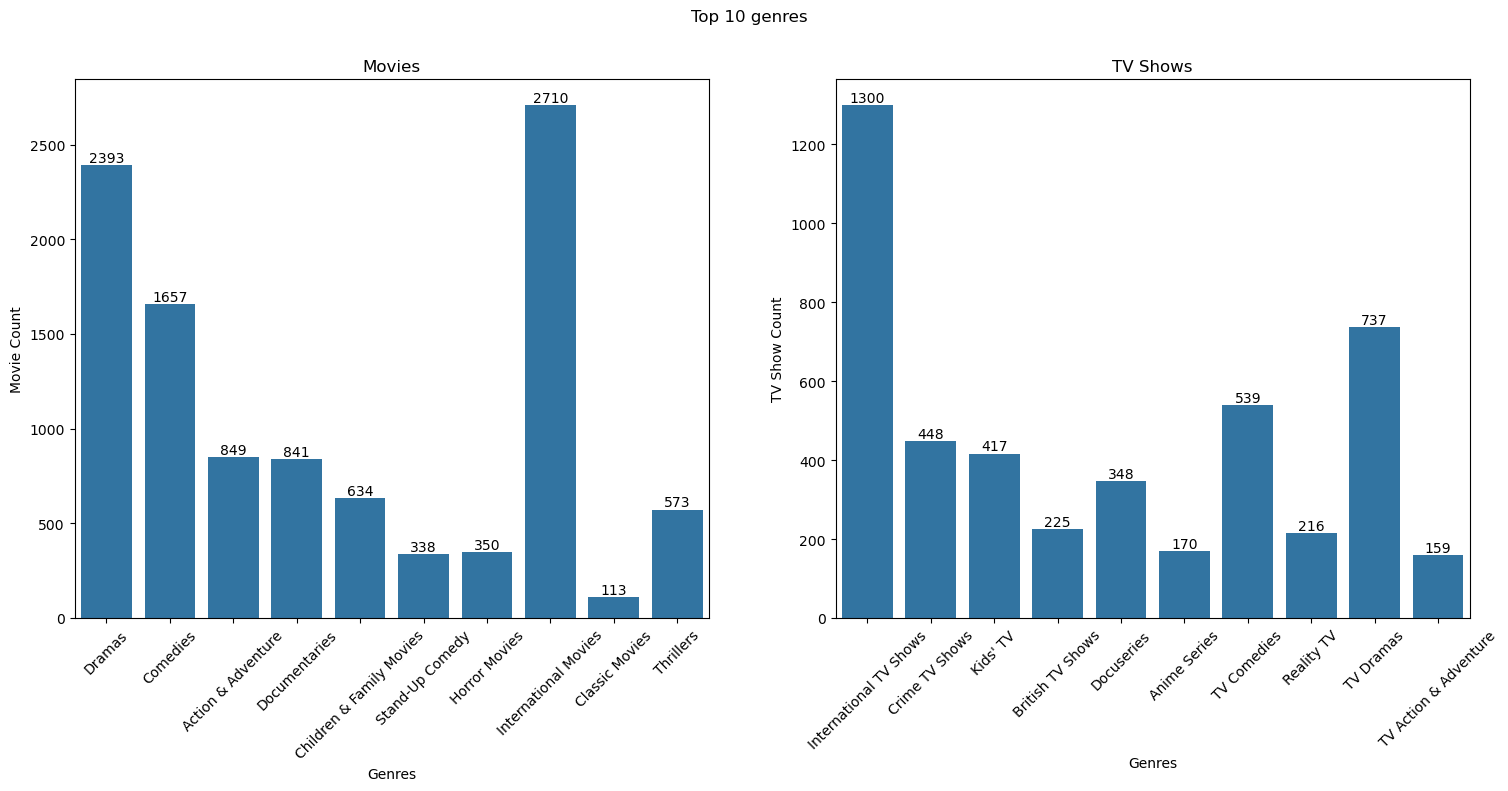

In [481]:
plt.figure(figsize = (18,7))
plt.suptitle('Top 10 genres')

plt.subplot(1,2,1)
label = sns.countplot(data = df_movies.drop_duplicates(subset = ['genre', 'title']), x = 'genre',
                      order = df_movies_temp['genre'].value_counts().head(10).index)
for i in label.containers:
    label.bar_label(i)
plt.title('Movies')
plt.xticks(rotation = 45)
plt.xlabel('Genres')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs.drop_duplicates(subset = ['genre', 'title']), x='genre',
                      order = df_tvs_temp['genre'].value_counts().head(10).index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('TV Show Count')

plt.show()

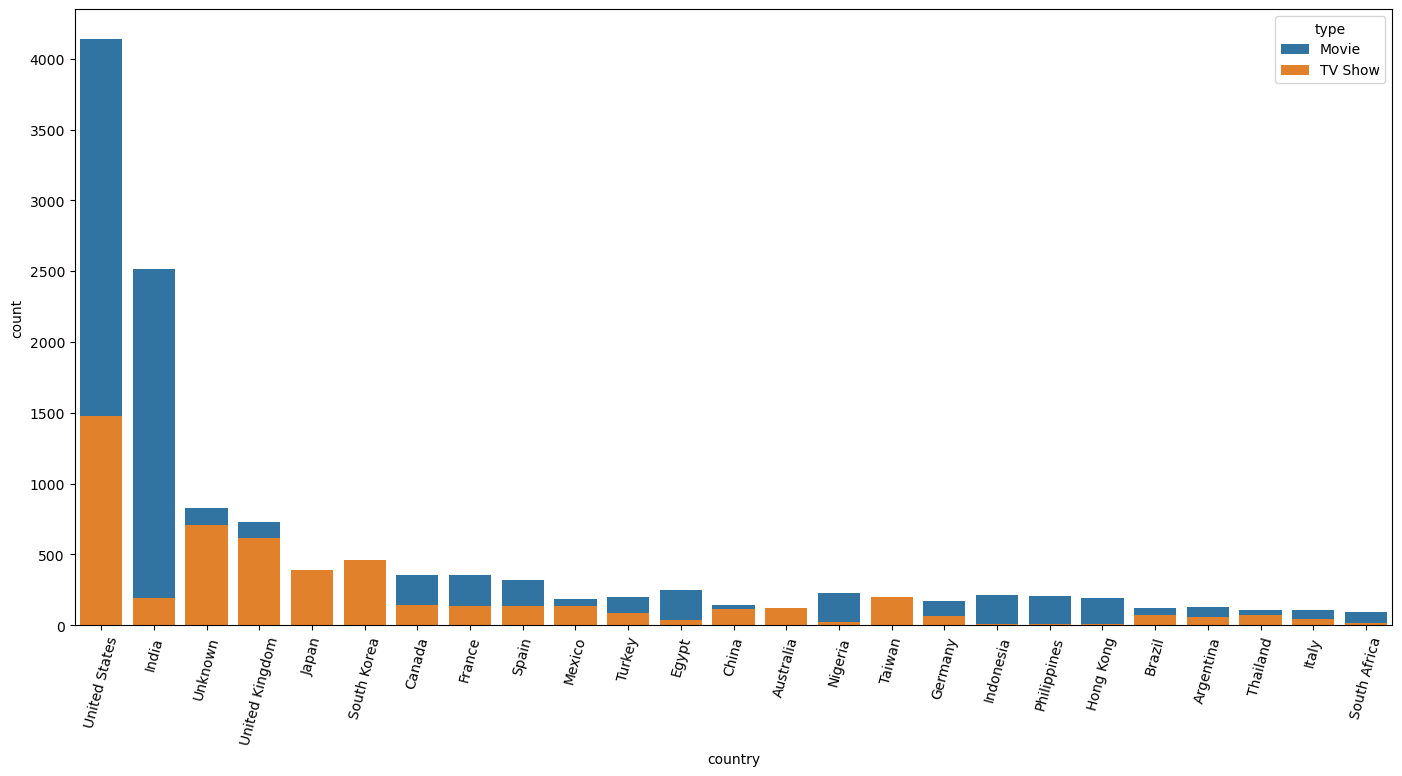

In [473]:
df_temp = df_new.drop_duplicates(subset = ['genre','title'])
plt.figure(figsize = (17,8))
plt.xticks(rotation=75)
label = sns.countplot(data = df_temp, x='country', hue = 'type', dodge = False, order = df_temp['country'].value_counts().head(25).index)
#for i in label.containers:
#    label.bar_label(i)
plt.show()

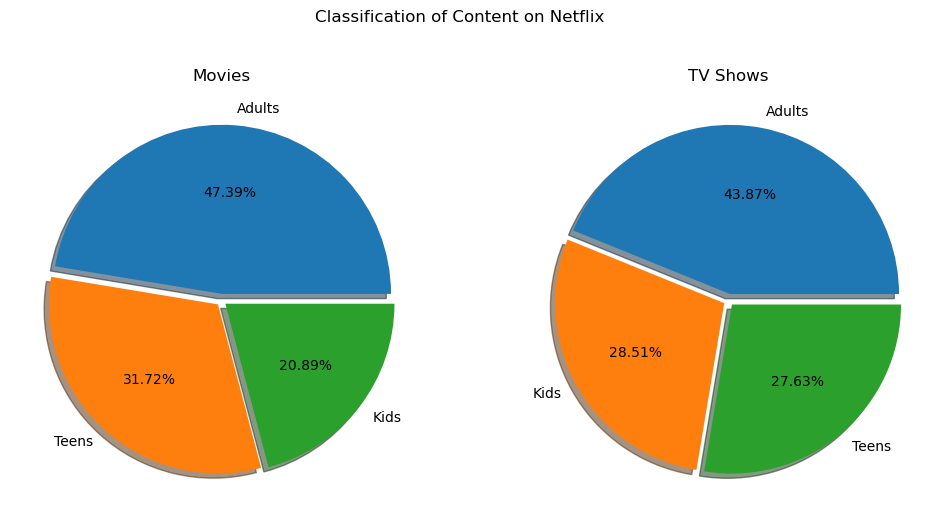

In [483]:
plt.figure(figsize = (12,6))
plt.suptitle('Classification of Content on Netflix')

plt.subplot(1,2,1)
plt.pie(df_movies.drop_duplicates(subset = ['rating','title'])['rating'].value_counts(), labels = df_movies_temp['rating'].value_counts().index, 
        autopct='%.2f%%', explode = (0.04,0.03,0.03), shadow = True)
plt.title('Movies')

plt.subplot(1,2,2)
plt.pie(df_tvs.drop_duplicates(subset = ['rating','title'])['rating'].value_counts(), labels = df_tvs_temp['rating'].value_counts().index,
        autopct='%.2f%%', explode = (0.04,0.03,0.03), shadow = True)
plt.title('TV Shows')

plt.show()


In [466]:
df_movies_temp['rating'].value_counts()

rating
Adults    2858
Teens     1913
Kids      1260
Name: count, dtype: int64

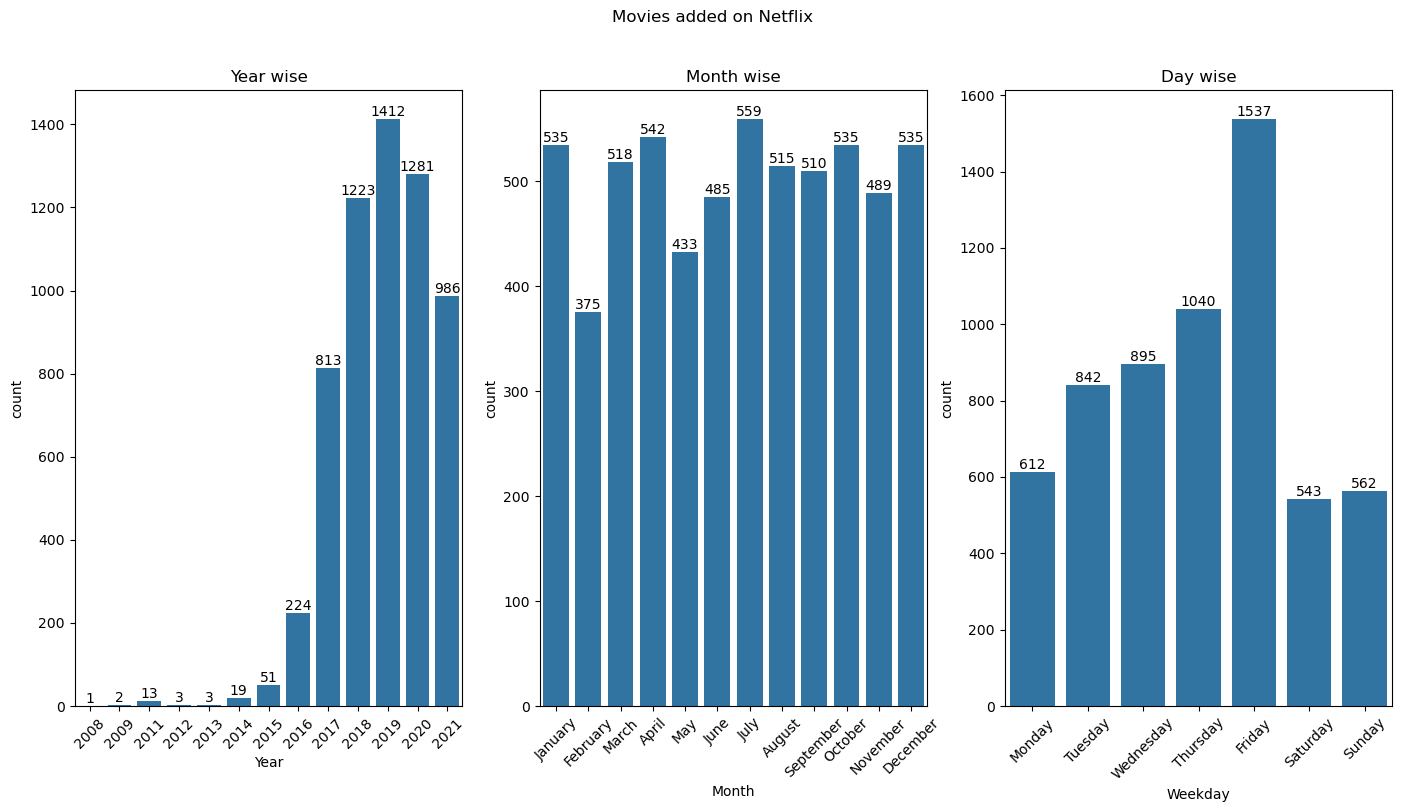

In [467]:
df_movies_temp = df_movies.drop_duplicates(subset = ['year','title'])
mv_year = df_movies_temp['year'].value_counts()
mv_year.sort_index(inplace=True)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September','October', 'November', 'December']
mv_month = df_movies_temp['month_name'].value_counts().loc[month_order]
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mv_day = df_movies_temp['weekday'].value_counts().loc[day_order]

plt.figure(figsize=(17,8))
plt.suptitle('Movies added on Netflix')

plt.subplot(1,3,1)
label = sns.countplot(data=df_movies_temp, x='year', order = mv_year.index)
for i in label.containers:
 label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
label = sns.countplot(data=df_movies_temp, x='month_name', order = mv_month.index)
for i in label.containers:
 label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,3,3)
label = sns.countplot(data=df_movies_temp, x='weekday', order = mv_day.index)
for i in label.containers:
 label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')
plt.show()

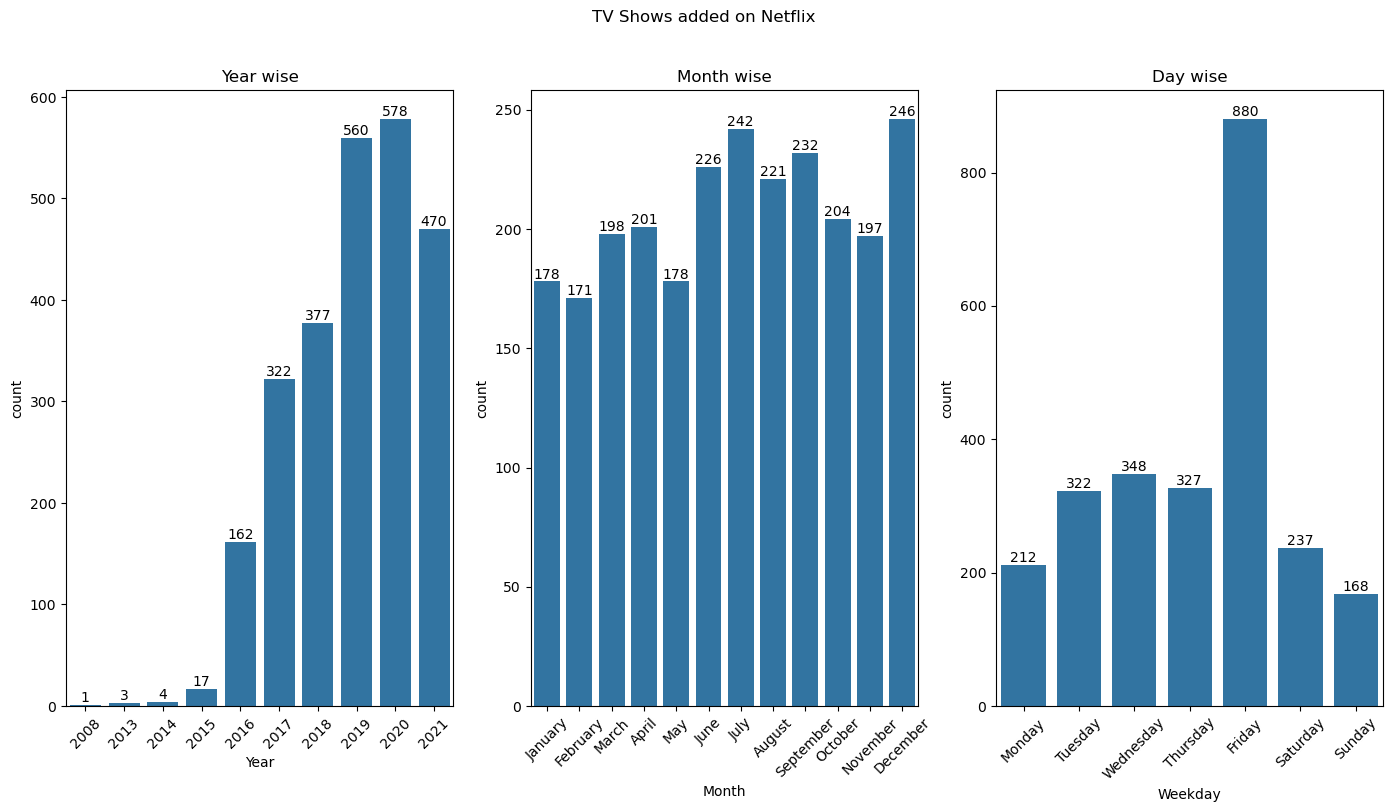

In [468]:
df_tvs_temp = df_tvs.drop_duplicates(subset = ['year','title'])
mv_year = df_tvs_temp['year'].value_counts()
mv_year.sort_index(inplace=True)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September','October', 'November', 'December']
mv_month = df_tvs_temp['month_name'].value_counts().loc[month_order]
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mv_day = df_tvs_temp['weekday'].value_counts().loc[day_order]

plt.figure(figsize=(17,8))
plt.suptitle('TV Shows added on Netflix')

plt.subplot(1,3,1)
label = sns.countplot(data=df_tvs_temp, x='year', order = mv_year.index)
for i in label.containers:
 label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
label = sns.countplot(data=df_tvs_temp, x='month_name', order = mv_month.index)
for i in label.containers:
 label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,3,3)
label = sns.countplot(data=df_tvs_temp, x='weekday', order = mv_day.index)
for i in label.containers:
 label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')

plt.show()

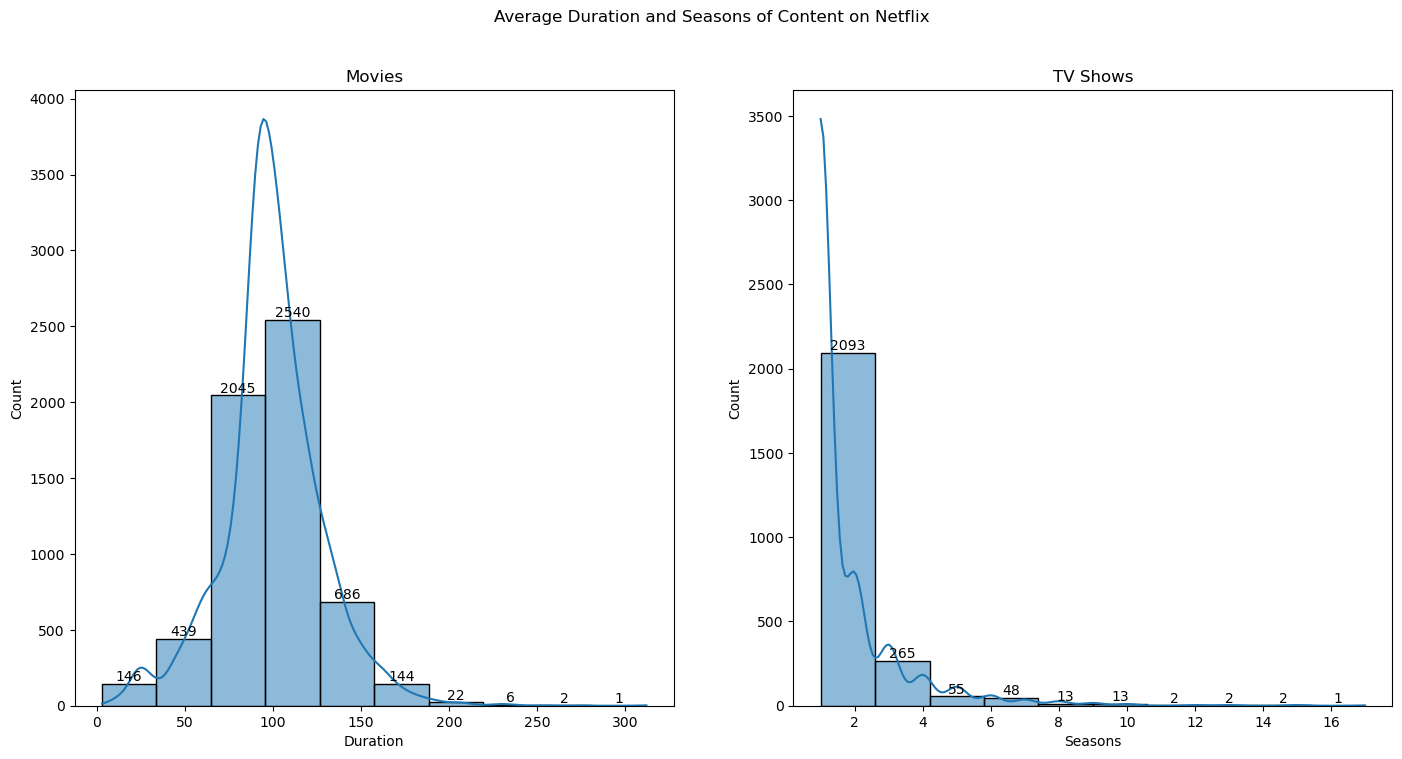

In [469]:
df_movies_temp = df_movies.drop_duplicates(subset = ['duration','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['seasons','title'])

plt.figure(figsize=(17,8))
plt.suptitle('Average Duration and Seasons of Content on Netflix')

plt.subplot(1,2,1)
label = sns.histplot(df_movies_temp['duration'].astype(int), bins=10, kde = True)
for i in label.containers:
 label.bar_label(i)
plt.xlabel('Duration')
plt.title('Movies')

plt.subplot(1,2,2)
label = sns.histplot(df_tvs_temp['seasons'].astype(int), bins=10, kde = True)
for i in label.containers:
 label.bar_label(i)
plt.xlabel('Seasons')
plt.title('TV Shows')

plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_9340\2164280593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_temp['duration'] = df_movies_temp['duration'].astype(int)
C:\Users\dell\AppData\Local\Temp\ipykernel_9340\2164280593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs_temp['seasons'] = df_tvs_temp['seasons'].astype(int)


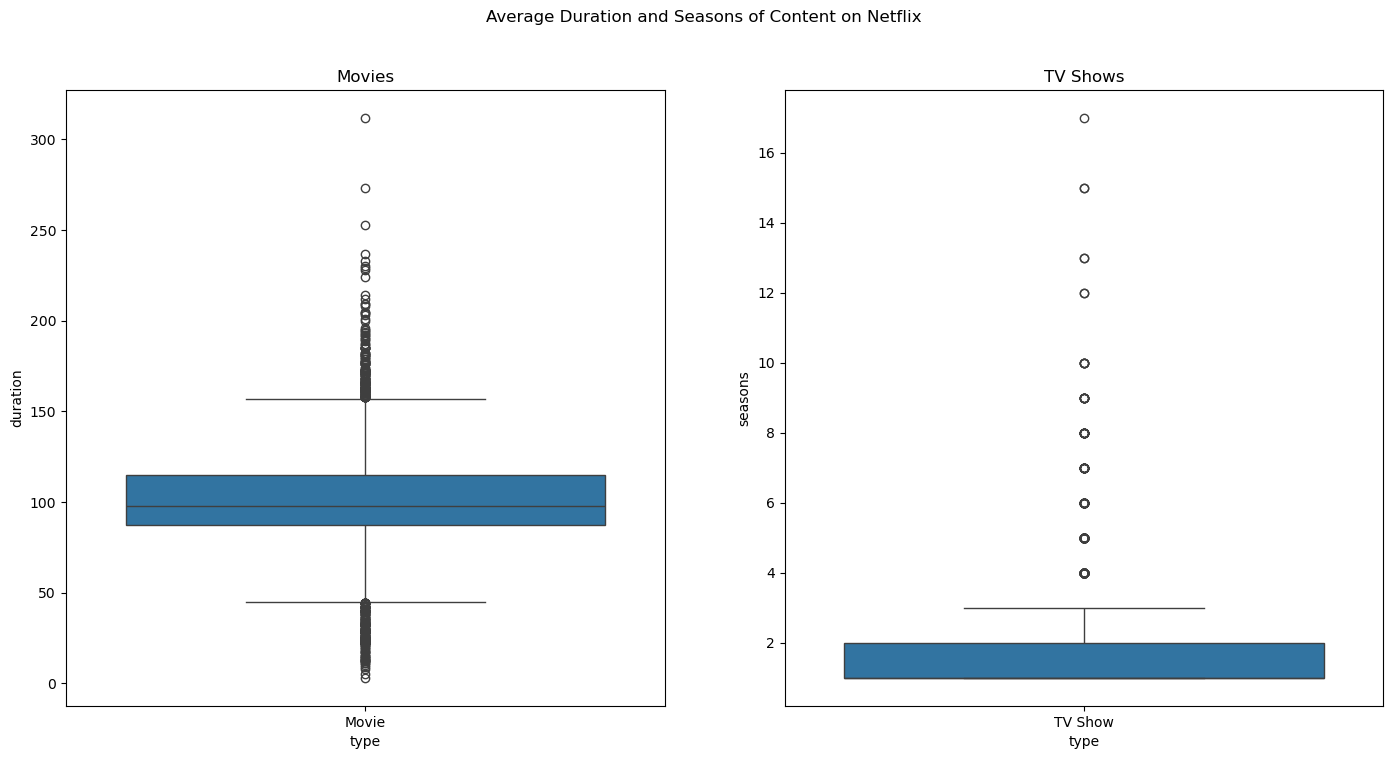

In [478]:
df_movies_temp['duration'] = df_movies_temp['duration'].astype(int)
df_tvs_temp['seasons'] = df_tvs_temp['seasons'].astype(int)

plt.figure(figsize  = (17,8))
plt.suptitle('Average Duration and Seasons of Content on Netflix')

plt.subplot(1,2,1)
sns.boxplot(df_movies_temp, x='type', y='duration')
plt.title('Movies')

plt.subplot(1,2,2)
sns.boxplot(df_tvs_temp, x='type', y ='seasons')
plt.title('TV Shows')

plt.show()

Text(0.5, 1.0, 'TV Shows Genres Word Cloud')

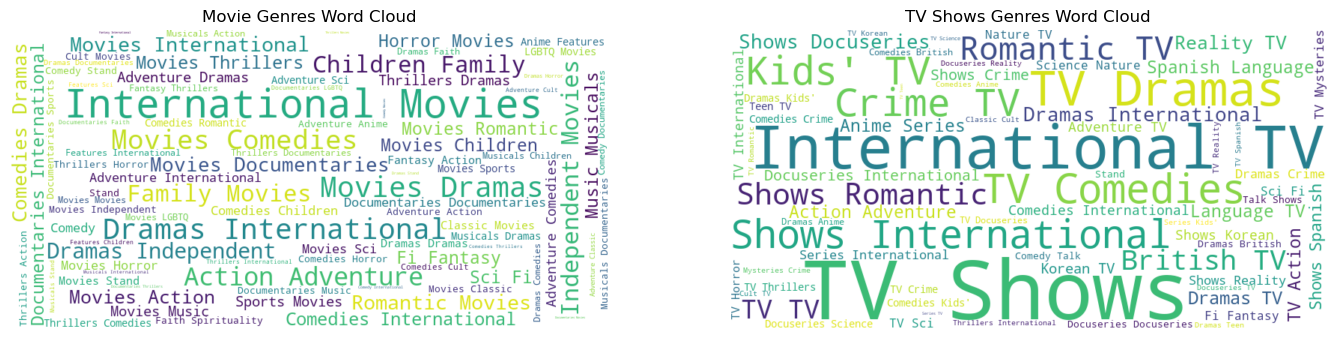

In [476]:
genre_text = " ".join(df_movies["genre"])
#genre_text = " ".join(df_movies["genre"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(genre_text)
plt.figure(figsize=(17, 10))
plt.subplot(1,2,1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Movie Genres Word Cloud")
genre_text1 = " ".join(df_tvs["genre"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(genre_text1)
plt.subplot(1,2,2)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("TV Shows Genres Word Cloud")
